<a href="https://colab.research.google.com/github/Karasiari/Graphs/blob/main/Beatweennesstests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Основной код - расчет navigational betweenness

На вход граф в виде - (adj_matrix - матрица смежности) и (dist_matrix - матрица расстояний)

In [33]:
def create_disc_levels(dist_matrix, t, n): # функция для разбивки графа на уровни по метрике

    distances_from_t = dist_matrix[t]

    vertex_distances = [(dist, vertex) for vertex, dist in enumerate(distances_from_t)]

    vertex_distances.sort(key=lambda x: x[0])

    disc = []
    current_level_num = 0
    current_level = []
    current_distance = None

    for dist, vertex in vertex_distances:
        if dist != current_distance:
            if current_level:
                disc.append((current_level_num, current_level))
                current_level_num += 1
            current_level = [vertex]
            current_distance = dist
        else:
            current_level.append(vertex)

    if current_level:
        disc.append((current_level_num, current_level))

    return disc

def calculate_navigational_betweenness(adj_matrix, dist_matrix): # основная функция с алгоритмом
  n = len(adj_matrix)
  neighbors = []
  for v in range(n):
    neighbors_v = [i for i in range(n) if adj_matrix[v][i] == 1]
    neighbors.append(neighbors_v)
  delta = [[None for i in range(n)] for j in range(n)]

  for t in range(n):
    # инициализация рабочих списков
    con = [0] * n
    n_t, p_t = [[] for i in range(n)], [[] for i in range(n)]
    sigma_t = [0] * n

    # 1) вычисление уровней
    disc = create_disc_levels(dist_matrix, t, n)

    # инициализация в t
    con[t] = 1
    sigma_t[t] = None

    # 2) BFS в одну сторону с получением списков n_t, p_t
    for level in disc:
      if level[0] != 0:
        for vertex in level[1]:
          min_neighbors_dist = None
          for neighbor in neighbors[vertex]:
            if (min_neighbors_dist is None) or (dist_matrix[t][neighbor] < min_neighbors_dist):
              min_neighbors_dist = dist_matrix[t][neighbor]

          for neighbor in neighbors[vertex]:
            if (con[neighbor] == 1) and (dist_matrix[t][neighbor] == min_neighbors_dist) and (min_neighbors_dist < dist_matrix[t][vertex]):
              n_t[vertex].append(neighbor)
              if sigma_t[neighbor] is None:
                sigma_t[vertex] = 1
              else:
                sigma_t[vertex] += sigma_t[neighbor]
              con[vertex] = 1
              p_t[neighbor].append(vertex)

    # 3) BFS в обратную с получением delta
    level_max_num = disc[-1][0]
    level_max = disc[level_max_num][1]
    for vertex in level_max:
      delta[t][vertex] = 0

    level_num = level_max_num - 1
    while level_num > 0:
      level = disc[level_num][1]
      for vertex in level:
        delta[t][vertex] = 0
        for u in p_t[vertex]:
          delta[t][vertex] += (sigma_t[vertex]/sigma_t[u]) * (delta[t][u] + 1)
      level_num -= 1

  # подсчет navigational betweenness
  B_nav = [0] * n
  for vertex in range(n):
    for t in range(n):
      if t != vertex:
        B_nav[vertex] += delta[t][vertex]

  return B_nav

Для визуализации графа

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def visualize_graph(adjacency_matrix, vertex_betweenness, title="Граф", layout_algorithm=nx.spring_layout):
    """
    Визуализирует граф с раскраской вершин по значениям betweenness centrality
    """
    # Создаем граф из матрицы смежности
    G = nx.from_numpy_array(np.array(adjacency_matrix))

    # Нормализуем значения betweenness для цветовой карты
    betweenness = np.array(vertex_betweenness)

    if betweenness.max() == betweenness.min():
        normalized_betweenness = np.ones_like(betweenness) * 0.5
    else:
        normalized_betweenness = (betweenness - betweenness.min()) / (betweenness.max() - betweenness.min())

    # Создаем цветовую карту (теплая палитра)
    colors = plt.cm.plasma(normalized_betweenness)

    # ЯВНО создаем фигуру и оси
    fig, ax = plt.subplots(figsize=(10, 8))

    # Рисуем граф на созданных осях
    pos = layout_algorithm(G)
    nx.draw_networkx_nodes(G, pos, ax=ax,
                          node_color=colors,
                          node_size=200,
                          edgecolors='black',
                          linewidths=0.5)
    nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.6, edge_color='gray')

    # Добавляем цветовую шкалу, явно указывая фигуру и оси
    sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma,
                              norm=plt.Normalize(vmin=betweenness.min(), vmax=betweenness.max()))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, shrink=0.8)
    cbar.set_label('Navigational betweenness Centrality')

    ax.set_title(f'{title}\n(чем теплее цвет - тем выше betweenness)')
    ax.axis('off')
    plt.tight_layout()
    plt.show()

    # Явно закрываем фигуру чтобы избежать наложения в цикле
    plt.close(fig)

Решетки

In [ ]:
import math

def make_lattice(n, m): # задаем матрицы для решетки по размеру
  adj_matrix = [[0 for i in range(n * m)] for j in range(n * m)]
  dist_matrix = [[0 for i in range(n * m)] for j in range(n * m)]

  for i in range(n * m):
    for j in range(n * m):
      if ((abs(i // m - j // m) == 1) and (i % m == j % m)) or ((abs(i % m - j % m) == 1) and (i // m == j // m)):
        adj_matrix[i][j] = 1
      dist_matrix[i][j] = math.sqrt((i // m - j // m) ** 2 + (i % m - j % m) ** 2)

  return adj_matrix, dist_matrix

Визуализация графа 1...


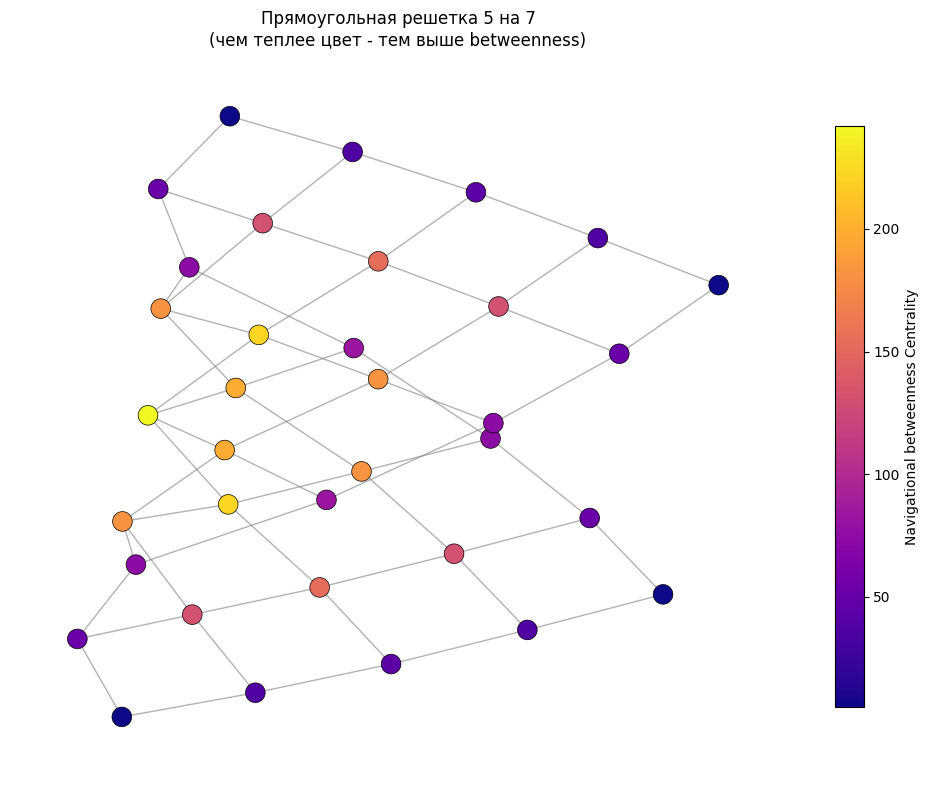

Визуализация графа 2...


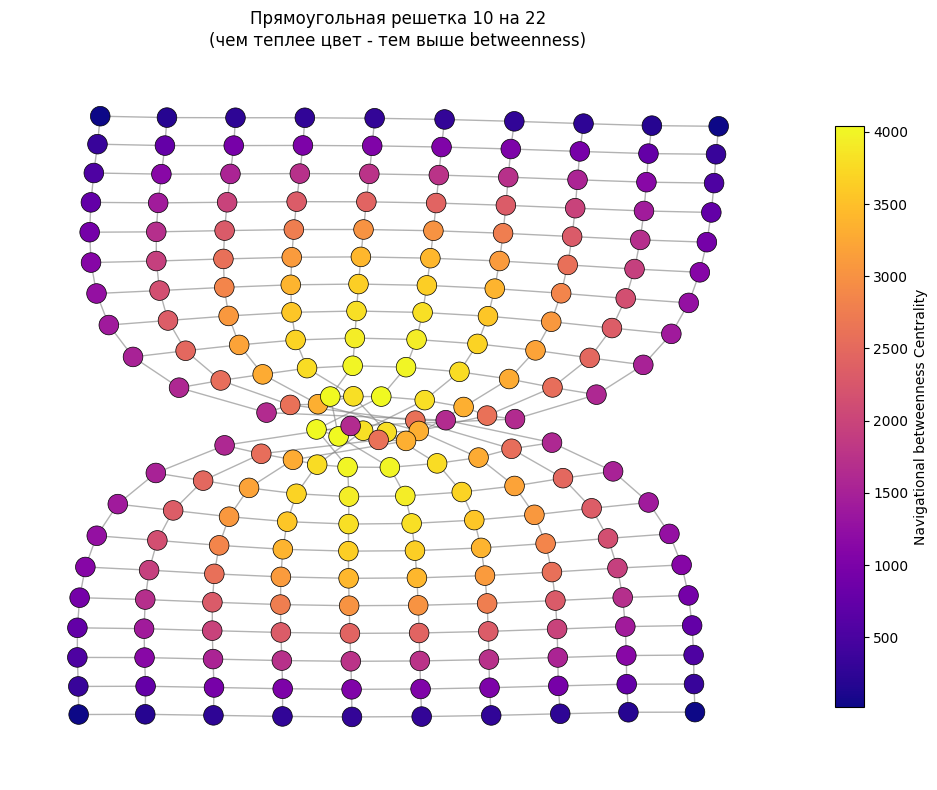

Визуализация графа 3...


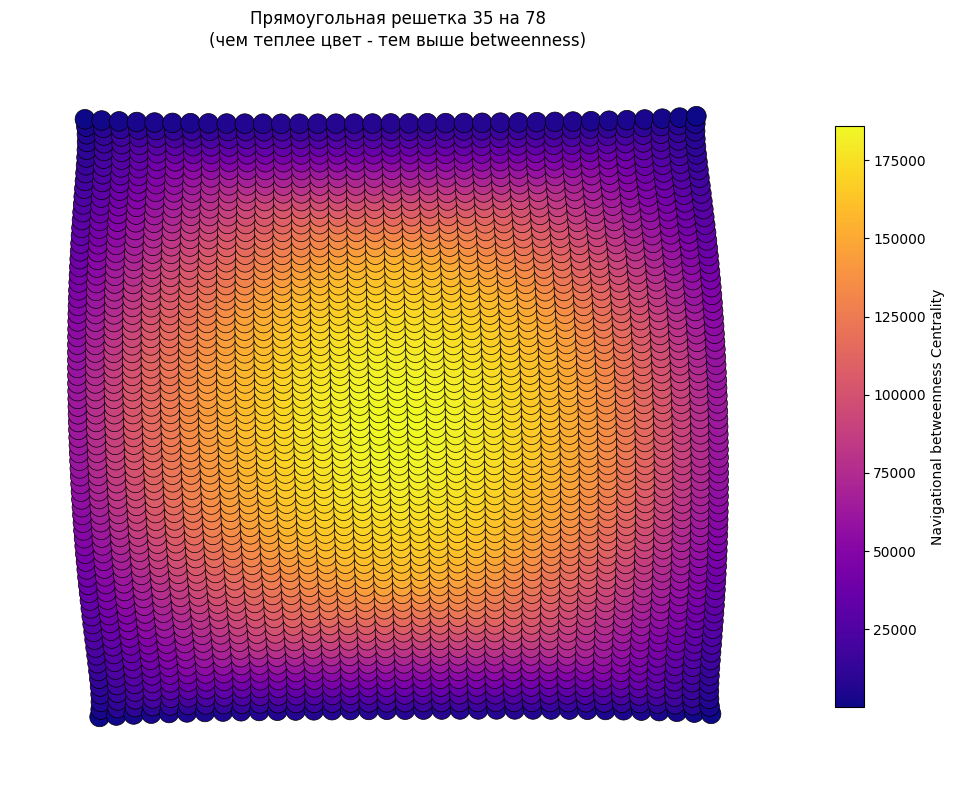

In [ ]:
lattices = [(5,7), (10,22), (35,78)]
test_cases = []

for lattice in lattices:
  adj_matrix, dist_matrix = make_lattice(lattice[0], lattice[1])
  B_nav = calculate_navigational_betweenness(adj_matrix, dist_matrix)
  title = f'Прямоугольная решетка {lattice[0]} на {lattice[1]}'
  test_dict = {"adj_matrix": adj_matrix, "betweenness": B_nav, "title": title}
  test_cases.append(test_dict)

for i, test_case in enumerate(test_cases):
  print(f"Визуализация графа {i+1}...")
  visualize_graph(
      test_case["adj_matrix"],
      test_case["betweenness"],
      title=test_case["title"],
      layout_algorithm=nx.kamada_kawai_layout
  )

Теперь на вложенных графах

In [34]:
pip install powerlaw

In [35]:
import pandas as pd
import polars as pl
import networkx as nx

import numpy as np
from itertools import combinations

#методы эмбеддингов:
#import umap
from sklearn.manifold import SpectralEmbedding, Isomap
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
import powerlaw


import scipy as sp
from matplotlib import pyplot as plt

In [36]:
#coalescent embedding - предварительное взвешивание графа


def number_of_common_neighbors(g):
    """
    Optimized calculation of the number of common neighbors.
    """
    adj = nx.to_numpy_array(g)
    return adj @ adj

def external_degree(g):
    """
    Optimized calculation of external degrees.
    """
    adj = nx.to_numpy_array(g)
    degree = adj.sum(axis=1)  # Степень узлов
    cn = number_of_common_neighbors(g)  # Оптимизированные общие соседи
    ext_degree = (degree[:, None] - cn - 1) * adj
    return ext_degree.T

def RA1_weights(g):
    """
    Optimized RA1 weights calculation.
    """
    degree = np.array(g.degree())[:, 1].astype(float)
    di, dj = np.meshgrid(degree, degree)
    cn = number_of_common_neighbors(g)
    return (di + dj + di * dj) / (1 + cn)

def RA2_weights(g):
    """
    Optimized RA2 weights calculation.
    """
    ei = external_degree(g)
    cn = number_of_common_neighbors(g)
    return (ei + ei.T + ei * ei.T) / (1 + cn)

def EBC_weights(g):
    """
    Optimized edge betweenness centrality weights.
    """
    w = nx.edge_betweenness_centrality(g)
    edges = [(u, v, w_val) for (u, v), w_val in w.items()]
    _g = nx.Graph()
    _g.add_weighted_edges_from(edges)
    return nx.to_numpy_array(_g)

In [37]:
#Генерация angular coordinates

# Функции для координат
def CA_coords(coords):
    return np.array(coords) / np.linalg.norm(coords, ord=2, axis=-1, keepdims=True)

def EA_coords(coords):
    zero_angle_vec = np.array([1, 0]).reshape((1, 2))
    coords = CA_coords(coords)
    angles = np.arctan2(coords[:, 1], coords[:, 0])
    inds = np.argsort(angles)
    rescaled = np.arange(len(coords))[inds]
    rescaled = rescaled * 2 * np.pi / len(coords)
    return np.stack((np.cos(rescaled), np.sin(rescaled)), axis=1)

# Функция для оценки параметра степенного распределения
def get_pl_exponent(G):
    degree = np.array([d for _, d in G.degree()])
    results = powerlaw.Fit(degree, verbose=False)
    return results.power_law.alpha

# Радиальная координата
def radial_coord_deg(G, beta, zeta=1):
    degrees = np.array([d for _, d in G.degree()]).astype(float)
    inds = np.argsort(-degrees)
    return 2 / zeta * (beta * np.log(inds + 1) + (1 - beta) * np.log(len(degrees)))



# Обновлённая функция hc_embedding с Isomap по умолчанию
def hc_embedding(
    G,
    pre_weighting='RA1',
    embedding=None,
    angular_func=EA_coords,
    n_neighbors=15,
    min_dist=0.1,   # теперь НЕ используется, оставлен только для совместимости сигнатуры
    n_jobs=12
):
    """
    Computes a hyperbolic coalescent embedding of a given graph using Isomap for dimensionality reduction
    (если embedding не передан).

    Args:
        G: networkx.Graph
            The input graph.
        pre_weighting: str or callable
            Determines the features that are passed to the dimensionality reduction method.
            If a string, it should be the name of the pre-weighting function (e.g., 'RA1' or 'RA2').
            If a callable, it should be a function that takes a graph and returns a weight matrix.
        embedding: Object
            An embedding model that implements the fit_transform method (like sklearn.manifold.Isomap
            or sklearn.manifold.SpectralEmbedding).
        angular_func: callable
            A function that computes angular coordinates from the embedding.
        n_neighbors: int
            The number of neighbors for Isomap (only used if embedding is None).
        min_dist: float
            Kept only for backward compatibility; not used with Isomap.
        n_jobs: int
            Number of parallel jobs for Isomap (only used if embedding is None).

    Returns:
        pd.DataFrame:
            A dataframe mapping nodes to their (x, y) spatial coordinates in the embedded space.
    """
    # Если передана строка, получить функцию по имени
    weight_func = {'RA1': RA1_weights}.get(pre_weighting)
    if weight_func is None:
        raise ValueError(f"Pre-weighting function '{pre_weighting}' not found.")

    # Вычисление весов (матрица признаков / похожести)
    weights = weight_func(G)

    # Если модель эмбеддинга не указана, используем Isomap
    if embedding is None:
        embedding_model = Isomap(
            n_components=2,
            n_neighbors=n_neighbors,
            n_jobs=n_jobs
        )
    else:
        embedding_model = embedding

    # Применяем модель эмбеддинга
    embedding = embedding_model.fit_transform(weights)

    # Угловые координаты
    angular_coords = angular_func(embedding)

    # Радиальные координаты
    gamma = get_pl_exponent(G)          # экспонента степенного распределения
    beta = 1.0 / (gamma - 1.0)

    radii = radial_coord_deg(G, beta)

    # Масштабируем угловые координаты радиусами
    coords = angular_coords * radii[..., None]

    # Сопоставляем узлы координатам
    node_ids = list(G.nodes)
    df = pd.DataFrame(coords, index=node_ids, columns=['x', 'y'])
    return df

In [51]:
# получаем матрицы для алгоритма из эмбеддинга
import math

def hyperbolic_distance(x, y):
  r_x, angle_x = float(x[0]), float(x[1])
  r_y, angle_y = float(y[0]), float(y[1])
  delta_angle = math.pi - abs(math.pi - abs(angle_x - angle_y))

  cosh_dist = math.cosh(r_x) * math.cosh(r_y) - math.sinh(r_x) * math.sinh(r_y) * math.cos(delta_angle)
  dist = math.acosh(cosh_dist) if cosh_dist > 1 else 0.0
  return dist

def get_matrices(G, emb):
  x = emb['x'].values
  y = emb['y'].values
  r = np.sqrt(x**2 + y**2)
  angles = np.arctan2(y, x)
  coords = list(zip(r, angles))

  dist_matrix = [[hyperbolic_distance(x, y) for x in coords] for y in coords]
  adj_matrix = nx.to_numpy_array(G).astype(int).tolist()

  return adj_matrix, dist_matrix

In [42]:
#отрисовка графа (если он маленький)
def curved_edges(G, pos, dist_ratio=0.2, bezier_precision=20, polarity='random'):
    """
    Создаёт сглаженные кривые для рисунка.

    Args:
        G: networkx.Graph - граф.
        pos: dict - позиции узлов.
        dist_ratio: float - коэффициент, определяющий расстояние до контрольных точек.
        bezier_precision: int - число точек для построения кривой.
        polarity: str - направление изгиба ('random' или фиксированное).

    Returns:
        numpy.ndarray - массив точек для каждого ребра.
    """
    edges = np.array(G.edges())
    l = edges.shape[0]

    # Полярность изгиба
    rnd = np.where(np.random.randint(2, size=l) == 0, -1, 1) if polarity == 'random' else 1

    # Получение координат узлов для рёбер
    u, inv = np.unique(edges, return_inverse=True)
    coords = np.array([pos[x] for x in u])[inv].reshape([edges.shape[0], 2, edges.shape[1]])
    coords_node1, coords_node2 = coords[:, 0, :], coords[:, 1, :]

    # Вычисление контрольных точек
    midpoints = (coords_node1 + coords_node2) / 2  # Средняя точка ребра
    dist = dist_ratio * np.sqrt(np.sum((coords_node1 - coords_node2) ** 2, axis=1))  # Длина контрольной линии
    directions = np.column_stack((
        coords_node2[:, 1] - coords_node1[:, 1],  # Перпендикулярное направление
        -(coords_node2[:, 0] - coords_node1[:, 0])
    ))
    directions = directions / np.linalg.norm(directions, axis=1, keepdims=True)  # Нормализация
    control_points = midpoints + rnd[:, None] * directions * dist[:, None]  # Контрольные точки

    # Генерация кривых (линейный сплайн или квадратичная интерполяция)
    curves = []
    for i in range(l):
        # Стартовая, контрольная и конечная точки
        p0, p1, p2 = coords_node1[i], control_points[i], coords_node2[i]
        t = np.linspace(0, 1, bezier_precision)[:, None]
        curve = (1 - t)**2 * p0 + 2 * (1 - t) * t * p1 + t**2 * p2  # Квадратичная интерполяция
        curves.append(curve)

    return np.array(curves)

def visualize_graph_beautifully(G, emb, B_nav):
  # 1. Преобразуем DataFrame с координатами в dict {node: (x, y)}
  pos = {node: (row['x'], row['y']) for node, row in emb.iterrows()}

  # 2. Получаем сглаженные ребра
  edges_curves = curved_edges(G, pos)

  # 3. Создаём LineCollection из кривых
  lc = LineCollection(edges_curves, alpha=0.5)

  # 3.5. Считаем радиус для каждого узла и нормируем его для цвета
  x = emb['x'].values
  y = emb['y'].values
  r = np.sqrt(x**2 + y**2)                       # радиус от центра
  r_norm = (r - r.min()) / (r.max() - r.min() + 1e-12)  # нормировка в [0, 1]
  betweenness = np.array(B_nav)
  if betweenness.max() == betweenness.min():
      normalized_betweenness = np.ones_like(betweenness) * 0.5
  else:
      normalized_betweenness = (betweenness - betweenness.min()) / (betweenness.max() - betweenness.min())

  # 4. Рисуем
  fig, ax = plt.subplots(figsize=(7, 7))

  # сначала рёбра
  ax.add_collection(lc)

  color_type = 'rainbow' # можно 'coolwarm', 'rainbow', 'viridis', 'hsv' и т.п.


  # узлы рисуем с теми же координатами pos и цветом по радиусу
  nx.draw_networkx_nodes(
      G,
      pos=pos,
      ax=ax,
      node_size=30,
      node_color=normalized_betweenness,
      cmap=color_type
  )

  ax.autoscale()   # чтобы подогнать границы под коллекцию рёбер
  ax.set_aspect('equal')
  plt.axis('off')

  # при желании показываем цветовую шкалу
  sm = plt.cm.ScalarMappable(cmap=color_type)
  sm.set_array(normalized_betweenness)
  plt.colorbar(sm, ax=ax, label='normalized navigational betweenness')

  plt.show()

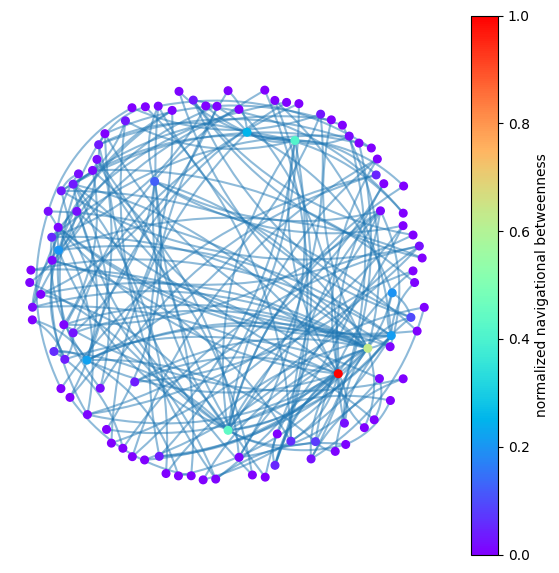

In [55]:
G = nx.powerlaw_cluster_graph(100, 2, 0.002)
emb = hc_embedding(G)
adj_matrix, dist_matrix = get_matrices(G, emb)
B_nav = calculate_navigational_betweenness(adj_matrix, dist_matrix)
visualize_graph_beautifully(G, emb, B_nav)